In [3]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [4]:
from gensim.models import KeyedVectors
model_dir = 'wiki-news-300d-1M.vec'
model = KeyedVectors.load_word2vec_format(model_dir, binary=False)

In [32]:
inputfile="230707_6.csv"

In [33]:
prior="obj_data.csv"

In [34]:
prior_data=pd.read_csv(f"{prior}")

obj_array=np.array(prior_data['class_name'])

In [35]:
data=pd.read_csv(f"{inputfile}")

interaction_array=np.array(data['interactions'])
interaction_with_array=np.array(data['target_obj'])
action_array=np.array(data['action'])

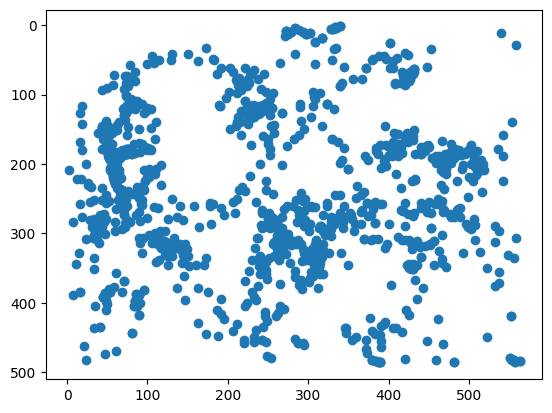

In [36]:
plt.gca().invert_yaxis()  # y軸を反転する
plt.scatter(data.loc[:, ['x']], data.loc[:, ['y']])

In [37]:
data

,time,x,y,action,interactions,target_obj
0,2023-07-07 19:40:40.237731,372,62,walking,none,none
1,2023-07-07 19:40:40.444592,372,62,walking,none,none
2,2023-07-07 19:40:40.856336,340,88,walking,none,none
3,2023-07-07 19:40:41.061566,340,88,walking,none,none
4,2023-07-07 19:40:41.268791,324,114,walking,none,none
...,...,...,...,...,...,...
1279,2023-07-07 19:46:16.839170,48,256,walking,none,none
1280,2023-07-07 19:46:17.043681,50,254,walking,none,none
1281,2023-07-07 19:46:17.248100,26,231,walking,none,none
1282,2023-07-07 19:46:17.454960,12,221,walking,none,none


In [38]:
all_data=data

In [39]:
data = data[(data['action'] != 'walking') | (data['interactions'] != 'none')]

In [40]:
data2=data.loc[:,['x','y']]
prior_data2=prior_data.loc[:,['x','y']]
all_data2=all_data.loc[:,['x','y']]

In [41]:
data2

,x,y
12,373,256
13,373,256
14,383,285
15,383,285
16,401,287
...,...,...
1252,217,93
1256,217,158
1277,91,282
1278,71,272


In [42]:
data3 = [list(e) for e in zip(data['x'],data['y'])]
prior_data3 = [list(e) for e in zip(prior_data['x'],prior_data['y'])]
all_data3 = [list(e) for e in zip(all_data['x'],all_data['y'])]

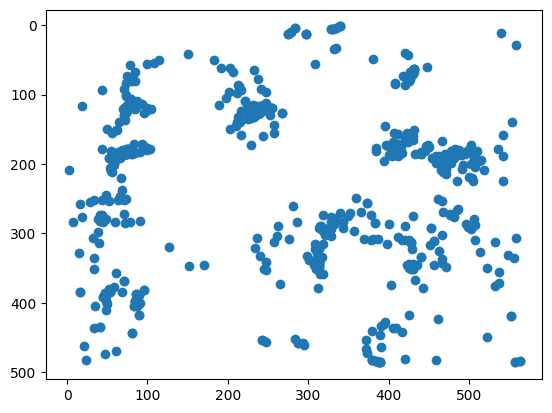

In [43]:
# data=pd.read_csv("20230623.csv")
plt.gca().invert_yaxis()  # y軸を反転する
plt.scatter(data.loc[:, ['x']], data.loc[:, ['y']])

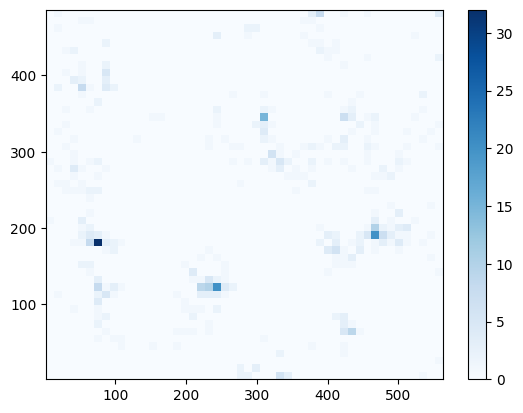

In [44]:
# data=pd.read_csv("20230623.csv")
plt.hist2d(data['x'], data['y'], bins=50, cmap='Blues')
plt.colorbar()
plt.show()

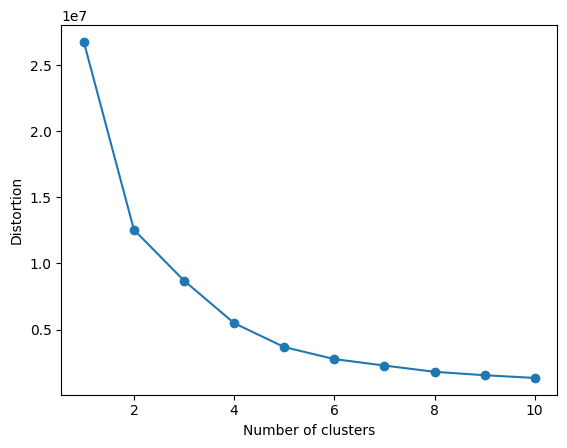

In [45]:
#elbow
distortions = []
distortions2 = []
distortions3 = []
for i in range(1,11):                 
    km = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(data3)                        
    distortions.append(km.inertia_) 

for i in range(1,11):                 
    km2 = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km2.fit(prior_data3)                        
    distortions2.append(km2.inertia_) 

for i in range(1,11):                 
    km3 = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km3.fit(all_data3)                        
    distortions3.append(km3.inertia_) 

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [46]:
N=4

In [47]:
km = KMeans(n_clusters=N, random_state=42)
label = km.fit_predict(data2[:])

km2 = KMeans(n_clusters=N, random_state=42)
label2 = km2.fit_predict(prior_data2[:])

km3 = KMeans(n_clusters=N, random_state=42)
label3 = km3.fit_predict(all_data2[:])


/Users/haruhiro/anaconda3/envs/sua/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/haruhiro/anaconda3/envs/sua/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/haruhiro/anaconda3/envs/sua/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


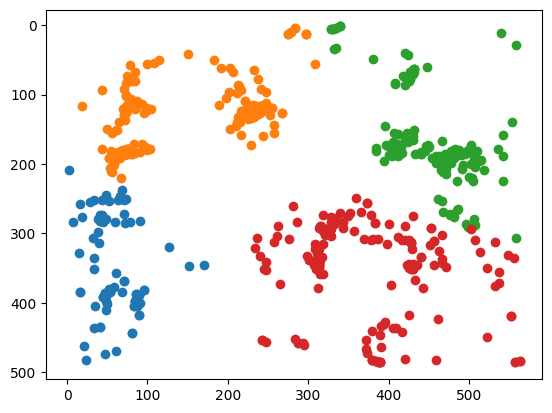

In [48]:
plt.gca().invert_yaxis()  # y軸を反転する
for i in range(N):
    plt.scatter(data.loc[:, ['x']][label==i], data.loc[:, ['y']][label==i])
plt.show()

[0.38037133, 0.5021895, 0.28146037, 0.28920233]
[0.37396723, 0.34527385, 0.4979509, 0.25430954]
[0.52210647, 0.38132122, 0.3727542, 0.55331856]
[0.5089557, 0.38817653, 0.33308622, 0.31937277]


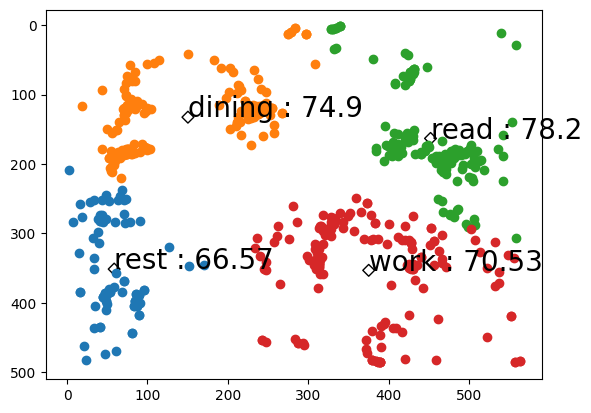

In [49]:
dd1=data.loc[:, ['y']][label==0]
ddList1 = dd1["y"].index.to_list()
dd2=data.loc[:, ['y']][label==1]
ddList2 = dd2["y"].index.to_list()
dd3=data.loc[:, ['y']][label==2]
ddList3 = dd3["y"].index.to_list()
dd4=data.loc[:, ['y']][label==3]
ddList4 = dd4["y"].index.to_list()

observedList1 =[]
action_observedList1 =[]
interaction_observedList1 =[]
for i in ddList1:
    if(interaction_array[i]!="none"):
        observedList1.append(interaction_array[i])
        action_observedList1.append(action_array[i])
        interaction_observedList1.append(interaction_array[i])
        observedList1.append(interaction_with_array[i])
    if(action_array[i]=="laying"):
        observedList1.append(action_array[i])
        action_observedList1.append(action_array[i])
        

observedList2 =[]
action_observedList2 =[]
interaction_observedList2 =[]
for i in ddList2:
    if(interaction_array[i]!="none"): 
        observedList2.append(interaction_array[i])
        observedList2.append(interaction_with_array[i]) 
        action_observedList2.append(action_array[i])
        interaction_observedList2.append(interaction_array[i])
    if(action_array[i]=="laying"):
        observedList2.append(action_array[i])
        action_observedList2.append(action_array[i])
    

observedList3 =[]
action_observedList3 =[]
interaction_observedList3 =[]
for i in ddList3:
    if(interaction_array[i]!="none"):
        observedList3.append(interaction_array[i])
        observedList3.append(interaction_with_array[i])
        action_observedList3.append(action_array[i])
        interaction_observedList3.append(interaction_array[i])
    if(action_array[i]=="laying"):
        observedList3.append(action_array[i])
        action_observedList3.append(action_array[i])
    

observedList4 =[]
action_observedList4 =[]
interaction_observedList4 =[]
for i in ddList4:
    if(interaction_array[i]!="none"):
        observedList4.append(interaction_array[i])
        observedList4.append(interaction_with_array[i])
        action_observedList4.append(action_array[i])
        interaction_observedList4.append(interaction_array[i])
    if(action_array[i]=="laying"):
        observedList4.append(action_array[i])
        action_observedList3.append(action_array[i])
    

split_values1 = []
original_values1 = []
for item in observedList1:
# for item in action_observedList1:
# for item in interaction_observedList1:
    split_items = item.split(',')
    split_values1.extend(split_items)
    original_values1.extend([item] * len(split_items))

split_values2 = []
original_values2 = []
for item in observedList2:
# for item in action_observedList2:
# for item in interaction_observedList2:
    split_items = item.split(',')
    split_values2.extend(split_items)
    original_values2.extend([item] * len(split_items))

split_values3 = []
original_values3 = []
for item in observedList3:
# for item in action_observedList3:
# for item in interaction_observedList3:
    split_items = item.split(',')
    split_values3.extend(split_items)
    original_values3.extend([item] * len(split_items))

split_values4 = []
original_values4 = []
for item in observedList4:
# for item in action_observedList4:
# for item in interaction_observedList4:
    split_items = item.split(',')
    split_values4.extend(split_items)
    original_values4.extend([item] * len(split_items))

centers = km.cluster_centers_
centers2 = km2.cluster_centers_
centers3 = km3.cluster_centers_
plt.gca().invert_yaxis()  # y軸を反転する
plt.scatter(centers[:, 0], centers[:, 1], marker="D", facecolors='none', edgecolors='black')
observed_lists = [split_values1, split_values2, split_values3, split_values4]
utilization_class_list = ['work','rest','dining','read']
utilization = 'none'

for i, observed_list in enumerate(observed_lists):
    score = [np.mean([model.similarity(utilization, observe) for observe in observed_list]) 
             for utilization in utilization_class_list]
    max_socre = np.max(score)

    similar_list = model.most_similar(f"{utilization}")
    most_similar_score =similar_list[0][1]
    prob = max_socre / most_similar_score *100

    max_index = np.argmax(score)
    print(score)
    utilization = utilization_class_list[max_index]
    plt.scatter(data.loc[:, ['x']][label==i], data.loc[:, ['y']][label==i])
    if prob>50:
        plt.text(centers[i][0], centers[i][1], f"{utilization} : {round(prob, 2)}", fontsize=20)
    else:
        plt.text(centers[i][0], centers[i][1], f"unknown", fontsize=20)
    

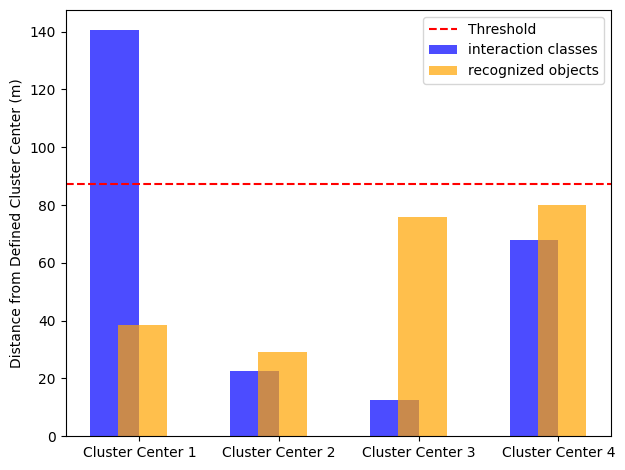

In [296]:
import numpy as np
import matplotlib.pyplot as plt

# Given 4 coordinates
target_coordinates = np.array([(515, 118), (398, 366.5), (100, 360), (202, 112)])

# Centers' coordinates
centers_coordinates = np.array(centers)
centers2_coordinates = np.array(centers2)

# Calculate the index of the nearest coordinate for each center
nearest_indices_centers = np.argmin(np.linalg.norm(centers_coordinates[:, None] - target_coordinates, axis=2), axis=1)
nearest_indices_centers2 = np.argmin(np.linalg.norm(centers2_coordinates[:, None] - target_coordinates, axis=2), axis=1)

# Calculate the distance from the nearest coordinate
distances_centers = np.linalg.norm(centers_coordinates - target_coordinates[nearest_indices_centers], axis=1)
distances_centers2 = np.linalg.norm(centers2_coordinates - target_coordinates[nearest_indices_centers2], axis=1)


# Set the threshold
threshold = 87.4

# Set bar width and offset
bar_width = 0.35
bar_offset = 0.2


# Plot the bar graph for centers (centers2 will be shifted by the bar_offset)
plt.bar(np.arange(len(distances_centers)), distances_centers, bar_width, label='interaction classes', color='blue', alpha=0.7)
plt.bar(np.arange(len(distances_centers2)) + bar_offset, distances_centers2, bar_width, label='recognized objects', color='orange', alpha=0.7)

# Plot the threshold line
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.ylabel('Distance from Defined Cluster Center (m)')


plt.xticks(np.arange(len(distances_centers)) + bar_width / 2, ['Cluster Center 1', 'Cluster Center 2', 'Cluster Center 3', 'Cluster Center 4'])
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()


In [297]:
split_values=split_values1 #1 2 work  3laying 4read
total_count = len(split_values)  # split_valuesリストの総要素数
# count1 = sum(1 for value in split_values if value == "reading")  # "reading"の数をカウント
# count2 = sum(1 for value in split_values if value == "book")  # "book"の数をカウント

# count1 = sum(1 for value in split_values if value == "eating")  # "reading"の数をカウント
count2 = sum(1 for value in split_values if value == "food")  # "book"の数をカウント
count1 = sum(1 for value in split_values if value == "drinking")  # "reading"の数をカウント
# count2 = sum(1 for value in split_values if value == "food")  # "book"の数をカウント



# count1 = sum(1 for value in split_values if value == "working")  # "reading"の数をカウント
# count2 = sum(1 for value in split_values if value == "keyboard")  # "book"の数をカウント

count1_percentage = (count1 / total_count) * 100  # "reading"の含有率を計算
count2_percentage = (count2 / total_count) * 100  # "book"の含有率を計算

print(f"Reading Percentage: {count1_percentage+count2_percentage:.2f}%")

# count1 = sum(1 for value in split_values if value == "laying")  # "reading"の数をカウント

# count1_percentage = (count1 / total_count) * 100  # "reading"の含有率を計算
# print(f"Reading Percentage: {count1_percentage:.2f}%")

Reading Percentage: 0.00%


[0.38485616, 0.42607012, 0.46042126, 0.31025752]
[0.37597662, 0.43288422, 0.46560237, 0.32560593]
[0.38582858, 0.4631021, 0.34571144, 0.28762183]
[0.37696552, 0.43060058, 0.46601236, 0.32364663]


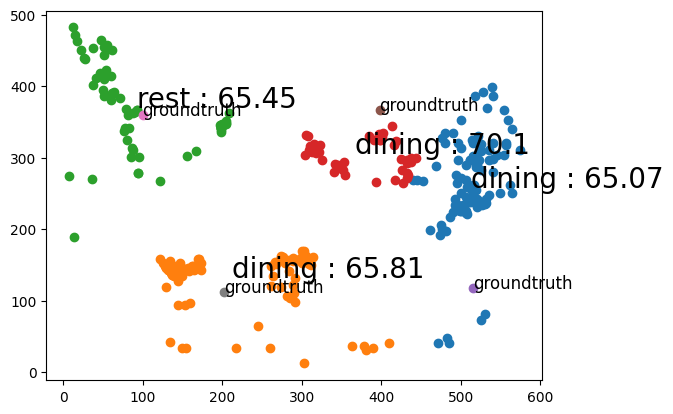

In [298]:
for i, observed_list in enumerate(observed_lists):
    score = [np.mean([model.similarity(utilization, observe) for observe in observed_list]) 
             for utilization in utilization_class_list]
    max_socre = np.max(score)

    similar_list = model.most_similar(f"{utilization}")
    most_similar_score =similar_list[0][1]
    prob = max_socre / most_similar_score *100

    max_index = np.argmax(score)
    print(score)
    utilization = utilization_class_list[max_index]
    plt.scatter(data.loc[:, ['x']][label==i], data.loc[:, ['y']][label==i])
    if prob>50:
        plt.text(centers[i][0], centers[i][1], f"{utilization} : {round(prob, 2)}", fontsize=20)
    else:
        plt.text(centers[i][0], centers[i][1], f"unknown", fontsize=20)

points = [(515, 118), (398, 366.5), (100, 360), (202, 112)]
labels = ["groundtruth"] * len(points)

for point, label in zip(points, labels):
    plt.scatter(point[0], point[1])
    
    plt.text(point[0], point[1], label, fontsize=12)

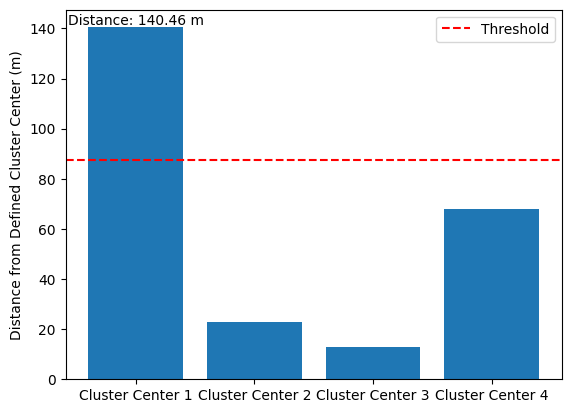

In [299]:
import numpy as np
import matplotlib.pyplot as plt

# Given 4 coordinates
target_coordinates = np.array([(515, 118), (398, 366.5), (100, 360), (202, 112)])

# Centers' coordinates
centers_coordinates = np.array(centers)

centers2_coordinates = np.array(centers2)

# Calculate the index of the nearest coordinate for each center
nearest_indices = np.argmin(np.linalg.norm(centers_coordinates[:, None] - target_coordinates, axis=2), axis=1)

# Calculate the distance from the nearest coordinate
distances = np.linalg.norm(centers_coordinates - target_coordinates[nearest_indices], axis=1)

# Set the threshold
threshold = 87.4

# Plot the bar graph
plt.bar(range(len(distances)), distances)

# Plot the threshold line
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
# plt.axhline(-threshold, color='red', linestyle='--', label='Threshold')
# Set the axis labels and title
# plt.xlabel('Cluster Index')
plt.ylabel('Distance from Defined Cluster Center (m)')
# plt.title('Distances to Nearest Coordinates')

# Add text if the distance exceeds the threshold
for i, distance in enumerate(distances):
    if distance > threshold:
        plt.text(i, distance, f"Distance: {distance:.2f} m", ha='center', va='bottom', fontsize=10)
        

plt.xticks(range(len(distances)), ['Cluster Center 1', 'Cluster Center 2', 'Cluster Center 3', 'Cluster Center 4'])
plt.legend()

# Display the graph
plt.show()


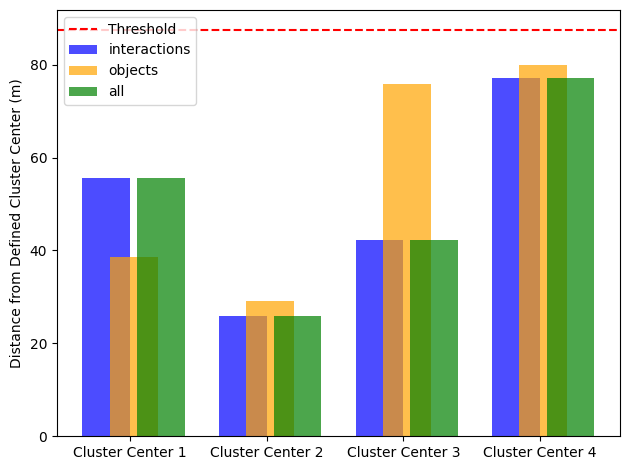

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Given 4 coordinates
target_coordinates = np.array([(515, 118), (398, 366.5), (100, 360), (202, 112)])

# Centers' coordinates
centers_coordinates = np.array(centers)
centers2_coordinates = np.array(centers2)
centers3_coordinates = np.array(centers3)

# Calculate the index of the nearest coordinate for each center
nearest_indices_centers = np.argmin(np.linalg.norm(centers_coordinates[:, None] - target_coordinates, axis=2), axis=1)
nearest_indices_centers2 = np.argmin(np.linalg.norm(centers2_coordinates[:, None] - target_coordinates, axis=2), axis=1)
nearest_indices_centers3 = np.argmin(np.linalg.norm(centers3_coordinates[:, None] - target_coordinates, axis=2), axis=1)

# Calculate the distance from the nearest coordinate
distances_centers = np.linalg.norm(centers_coordinates - target_coordinates[nearest_indices_centers], axis=1)
distances_centers2 = np.linalg.norm(centers2_coordinates - target_coordinates[nearest_indices_centers2], axis=1)
distances_centers3 = np.linalg.norm(centers3_coordinates - target_coordinates[nearest_indices_centers3], axis=1)


# Set the threshold
threshold = 87.4

# Set bar width and offset
bar_width = 0.35
bar_offset = 0.2


# Plot the bar graph for centers (centers2 will be shifted by the bar_offset)
plt.bar(np.arange(len(distances_centers)), distances_centers, bar_width, label='interactions', color='blue', alpha=0.7)
plt.bar(np.arange(len(distances_centers2)) + bar_offset, distances_centers2, bar_width, label='objects', color='orange', alpha=0.7)
plt.bar(np.arange(len(distances_centers3)) + bar_offset*2, distances_centers3, bar_width, label='all', color='green', alpha=0.7)

# Plot the threshold line
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.ylabel('Distance from Defined Cluster Center (m)')


plt.xticks(np.arange(len(distances_centers)) + bar_width / 2, ['Cluster Center 1', 'Cluster Center 2', 'Cluster Center 3', 'Cluster Center 4'])
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()


In [65]:
similar_list = model.most_similar('work')
for similar_set in similar_list:
    print(str(similar_set[0])+ " : " + str(similar_set[1]))

works : 0.717581570148468
working : 0.6682043671607971
job : 0.6681519746780396
Work : 0.642331063747406
work. : 0.6332440972328186
research : 0.6295222640037537
work- : 0.6242907047271729
doing : 0.6225779056549072
effort : 0.6146255731582642
work-- : 0.6137425303459167


In [38]:
wordsList = ["keyboard", "cellphone", "bottle", "book", "food", "sitting", "standing", "walking", "drinking", "reading", "calling", "working", "laying", "eating"]
for words in wordsList:
    print(f'{words}',model.similarity('dining', f'{words}'))

keyboard 0.31231794
cellphone 0.33180833
bottle 0.3025628
book 0.35129306
food 0.5765886
sitting 0.46560237
standing 0.4248186
walking 0.47421372
drinking 0.52067
reading 0.39421532
calling 0.3438409
working 0.3924974
laying 0.28146034
eating 0.61978775


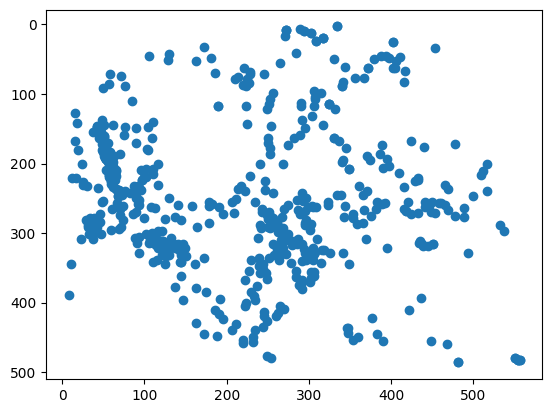

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv(f'{inputfile}')

# 条件に合致する行を抽出する
filtered_df = df[(df['action'] == 'walking') & (df['interactions'] == 'none')]

# x列とy列を取得
x_values = filtered_df['x']
y_values = filtered_df['y']

# プロット
plt.scatter(x_values, y_values)
plt.gca().invert_yaxis()  # y軸を反転する
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Walking with no interactions')
plt.show()
